## 데이터 불균형(Imbalanced Data)

한 클래스의 데이터가 다른 클래스에 비해 훨씬 많을 때 데이터 불균형이 발생한다. 데이터 불균형은 모델의 학습 과정에 영향을 미치는데, 특정 유형의 데이터에 overfitting되어서 다른 유형은 제대로 학습되지 못해 underfitting되는 문제가 발생한다.

- 일반화 능력이 저하되어서 새로운 상황, 새로운 데이터 패턴을 탐지하는 성능이 저하됨
- 불균형한 데이터 세트는 이상 데이터를 정확히 찾아내지 못할 수 있다는 문제점이 존재

## 데이터를 조정해서 불균형 데이터를 해결하는 샘플링 기법

In [70]:
# 타이타닉 데이터 불러오기
import pandas as pd

df = pd.read_csv('./titanic.csv')

display(df.head())
display(df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [71]:
# 생존여부, 성별에 따른 나이의 평균값
df.groupby(['Survived', 'Sex']).Age.mean()

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

In [72]:
# # 생존여부, 성별에 따른 나이의 평균값으로 결측치 처리
df['Age_filled'] = df.groupby(['Survived', 'Sex']).Age.transform(lambda g: g.fillna(g.mean()))
df['Age_filled']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    25.046875
889    26.000000
890    32.000000
Name: Age_filled, Length: 891, dtype: float64

In [73]:
# 나이를 연령대 필드로 바꾸고 싶음
cond = df.Age_filled >= 10
cond

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Age_filled, Length: 891, dtype: bool

In [74]:
# 연령대 필드 생성

def age_categorize(age):
  age = (age // 10) * 10
  return age

df['Age_category'] = df.Age_filled.apply(age_categorize)
df['Age_category']

0      20.0
1      30.0
2      20.0
3      30.0
4      30.0
       ... 
886    20.0
887    10.0
888    20.0
889    20.0
890    30.0
Name: Age_category, Length: 891, dtype: float64

In [75]:
# 성별 레이블 인코딩
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

In [76]:
from sklearn.model_selection import train_test_split

X = df[['Age_category','Sex']]
y = df['Survived']

# train, test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
print("원본 데이터셋의 클래스 분포:\n", y_train.value_counts(), "\n")

print("원본 데이터셋의 클래스 분포:\n", y_train.value_counts(normalize=True) * 100)

원본 데이터셋의 클래스 분포:
 0    392
1    231
Name: Survived, dtype: int64 

원본 데이터셋의 클래스 분포:
 0    62.921348
1    37.078652
Name: Survived, dtype: float64


### 1. 오버 샘플링(Over-sampling)

### 1-1. 단순 무작위 복제: 소수 클래스의 샘플들을 단순히 복사하여 늘리는 접근 방식

[장점]¶
- 간단하고 쉬운 구현
복제 방법은 기술적으로 가장 간단한 오버샘플링 기법 중 하나입니다. 복잡한 알고리즘 없이 데이터의 일부를 복사하여 사용하기 때문에, 쉽게 구현하고 적용할 수 있습니다.

- 빠른 처리 시간
추가적인 데이터 처리나 복잡한 계산이 필요 없기 때문에, 데이터 증가가 빠르게 이루어집니다.
큰 데이터셋에서도 빠르게 오버샘플링을 수행할 수 있습니다.

- 데이터 분포 유지
복제 방법은 원본 데이터의 분포를 그대로 유지하면서 샘플 수만 증가시킵니다.
이는 소수 클래스의 특성을 변형시키지 않고 그대로 보존한다는 장점이 있습니다.

[단점]
- 과적합(Overfitting)의 위험
복제 방법은 동일한 데이터를 반복하여 추가하기 때문에, 모델이 훈련 데이터에 과도하게 최적화되는 과적합을 일으킬 위험이 있습니다.
이는 모델이 새로운 데이터에 대한 일반화 능력을 잃을 수 있음을 의미합니다.

- 데이터 다양성 부족
새롭고 다양한 정보를 추가하지 않고 기존 데이터를 단순히 복제하기 때문에, 데이터셋의 다양성이 증가하지 않습니다.
이로 인해 모델이 다양한 상황에 대응하는 능력을 충분히 개발하지 못할 수 있습니다.

- 실제 분포와의 불일치
특히, 실제 상황에서 소수 클래스가 다양한 형태로 나타날 경우, 단순 복제로는 이러한 다양성을 충분히 반영할 수 없어, 현실 세계의 복잡한 패턴을 모델링하는 데 한계가 있습니다.

In [78]:
from imblearn.over_sampling import RandomOverSampler

# 오버샘플링 적용
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# 결과 출력
print("오버샘플링 적용 후의 클래스 분포:\n", y_resampled.value_counts())

오버샘플링 적용 후의 클래스 분포:
 1    392
0    392
Name: Survived, dtype: int64


###1-2. SMOTE(Synthetic Minority Over-sampling Technique, 합성 소수 오버샘플링 기법): 기존 소수 클래스 인스턴스 간의 특성을 보간하여 새로운 합성 샘플을 생성

[과정]
1. 이웃 선택
SMOTE에서는 먼저 소수 클래스의 특정 인스턴스(데이터 포인트)를 선택합니다.
그 다음, 이 인스턴스와 가장 가까이 있는 다른 소수 클래스 인스턴스들 중에서 하나 이상을 '이웃'으로 선택합니다.
이 이웃들은 선택한 원본 인스턴스와 비슷한 특성을 가진 데이터 포인트들입니다.

2. 임의의 이웃 선택
이 중에서 하나의 이웃을 무작위로 선택합니다.
이 과정은 데이터셋에서 다양성을 보장하기 위해 무작위성을 도입하는 것입니다.
선택된 이웃은 원본 인스턴스와 비슷하지만, 완전히 동일하지는 않습니다.

3. 특성 차이 계산
선택된 이웃과 원본 인스턴스 간의 각 특성 값(예: 데이터 포인트의 각 변수 값)의 차이를 계산합니다.
이 차이는 새로운 데이터 포인트를 생성하는 데 사용될 '간격' 또는 '벡터'를 나타냅니다.

4. 새 인스턴스 생성
계산된 특성 차이에 0과 1 사이의 무작위 수(랜덤 스칼라 값)를 곱합니다.
이것은 새로운 합성 인스턴스가 원본 인스턴스와 선택된 이웃 사이의 '중간점'에 위치하도록 합니다.
무작위 수를 곱함으로써, 생성된 새 인스턴스는 원본 인스턴스와 정확히 동일하지 않고 약간의 변화를 가지게 됩니다.

5. 합성 인스턴스 추가
이렇게 계산된 새 특성 값은 원본 인스턴스의 특성 값에 추가되어, 최종적으로 새로운 합성 인스턴스를 생성합니다.
이 새로운 합성 인스턴스는 원본 데이터셋에 추가됩니다.


[장점]
1. 데이터 다양성 증가
SMOTE는 기존 소수 클래스 샘플 사이에 새로운, 합성된 샘플을 생성함으로써 데이터의 다양성을 증가시킵니다.
이는 모델이 더 많은 유형의 패턴을 학습하고 이해하는 데 도움을 줍니다.

2. 과적합 감소
단순한 복제 방법에 비해, SMOTE는 새로운 종류의 샘플을 생성함으로써 모델이 단순히 기존 데이터를 외우는 것이 아니라,
일반화된 학습을 수행할 수 있도록 합니다. 이는 과적합의 위험을 줄여줍니다.

3. 모델 성능 향상
SMOTE로 생성된 다양한 샘플을 통해 모델은 실제 세계의 다양한 시나리오를 더 잘 반영할 수 있게 되며, 결과적으로 모델의 성능이 향상될 수 있습니다.

[단점]
1. 잘못된 샘플 생성 위험
SMOTE는 새로운 샘플을 생성할 때, 기존 데이터의 패턴을 기반으로 합니다.
이 과정에서 잘못된 정보를 반영하는 샘플을 생성할 수 있으며, 이는 모델의 학습에 부정적인 영향을 미칠 수 있습니다.

2. 계산 복잡성
SMOTE는 단순 복제 방법보다 계산적으로 복잡합니다.
새로운 샘플을 생성하기 위해 기존 데이터 포인트들 사이의 관계를 분석해야 하므로, 더 많은 계산 리소스와 시간이 필요합니다.

3. 적용의 어려움
특히, 노이즈가 많은 데이터셋이나 변수가 많은 복잡한 데이터셋에서는 SMOTE를 적용하기 어려울 수 있으며,
부적절한 적용은 모델의 성능에 부정적인 영향을 미칠 수 있습니다.

In [79]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# 결과 출력
print("오버샘플링 적용 후의 클래스 분포:\n", y_smote.value_counts())

오버샘플링 적용 후의 클래스 분포:
 1    392
0    392
Name: Survived, dtype: int64


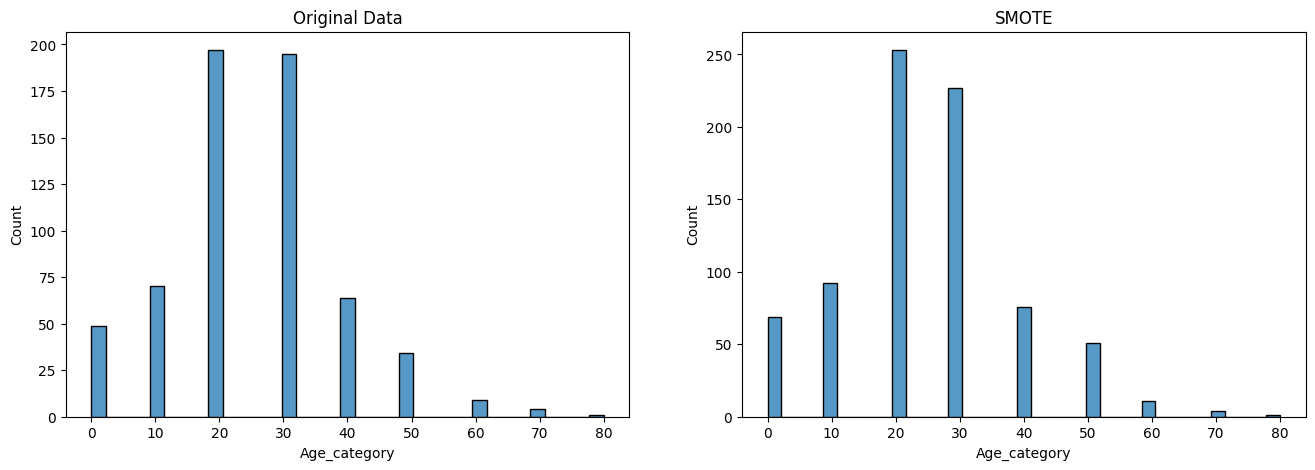

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# 피처 선택
feature1 = 'Age_category'
feature2 = 'Sex'

# 원본 데이터 분포 시각화
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train.loc[:, feature1])
plt.title('Original Data')

# SMOTE 방법으로 오버샘플링한 데이터 시각화
plt.subplot(1, 2, 2)
sns.histplot(X_smote.loc[:, feature1])
plt.title('SMOTE')

plt.show()

Text(0.5, 1.0, 'SMOTE')

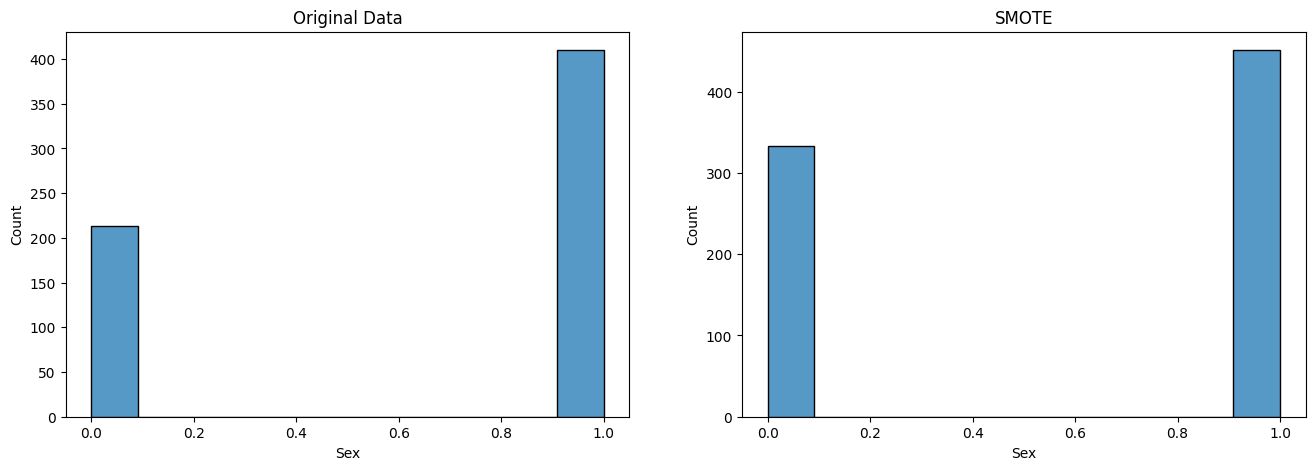

In [81]:
# 원본 데이터 분포 시각화
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train.loc[:, feature2])
plt.title('Original Data')

# SMOTE 방법으로 오버샘플링한 데이터 시각화
plt.subplot(1, 2, 2)
sns.histplot(X_smote.loc[:, feature2])
plt.title('SMOTE')